In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import math as mt

In [4]:
def cube(length, dots, dim):
    return np.random.rand(dots, dim) * length

def distance(data, bins):
    hist = np.histogram(np.zeros(shape = len(data)), bins = bins)[0]
    for k in data: hist += np.histogram(np.sqrt(np.sum(np.square(data - k), axis = 1)), bins = bins)[0]
    return hist/2

def correlate(data, random, bins, length, landy = True):
    fullData = data + random

    dataPairs = mt.factorial(len(data))/(2 * mt.factorial(len(data) - 2))
    randomPairs = mt.factorial(len(random))/(2 * mt.factorial(len(random) - 2))
    fullPairs = mt.factorial(len(fullData))/(2 * mt.factorial(len(fullData) - 2))
    
    sep = [k * length/bins for k in range(bins + 1)]

    DD = distance(data, bins = sep)/dataPairs
    RR = distance(random, bins = sep)/randomPairs
    DR = distance(fullData, bins = sep)/fullPairs
    
    if landy == True: C = (DD - 2*DR + RR)/RR
    elif landy == False: C = DD/RR - 1
        
    r = [(k + 1)*(length/bins) + length/(2 * bins) for k in range(bins)]
    
    return [r, C]

In [3]:
dots1 = cube(dim = 3, dots = 1000, length = 100)
dots2 = cube(dim = 3, dots = 1000, length = 100)

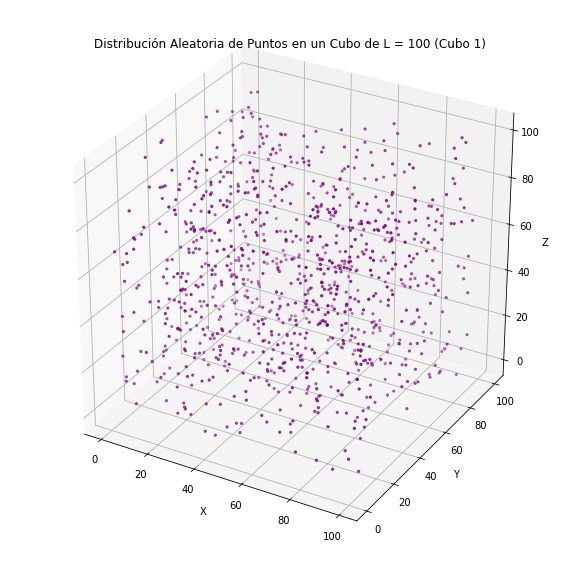

In [4]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribución Aleatoria de Puntos en un Cubo de L = 100 (Cubo 1)')
ax.scatter(dots1.T[0], dots1.T[1], dots1.T[2], marker = '.', color = 'purple')
plt.show()

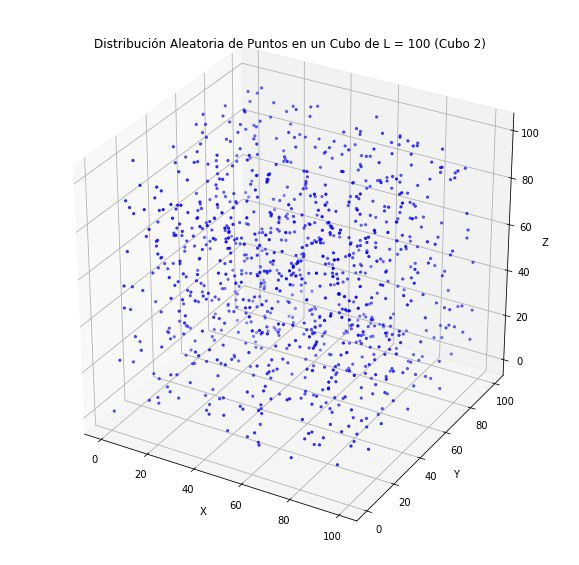

In [5]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribución Aleatoria de Puntos en un Cubo de L = 100 (Cubo 2)')
ax.scatter(dots2.T[0], dots2.T[1], dots2.T[2], marker = '.', color = 'blue')
plt.show()

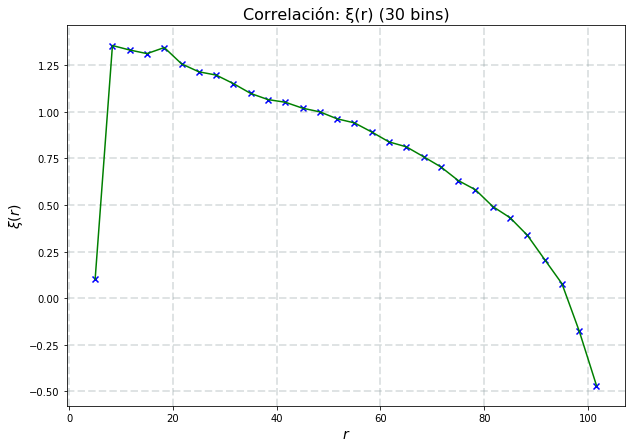

In [6]:
result = correlate(dots1, dots2, bins = 30, length = 100)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (30 bins)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

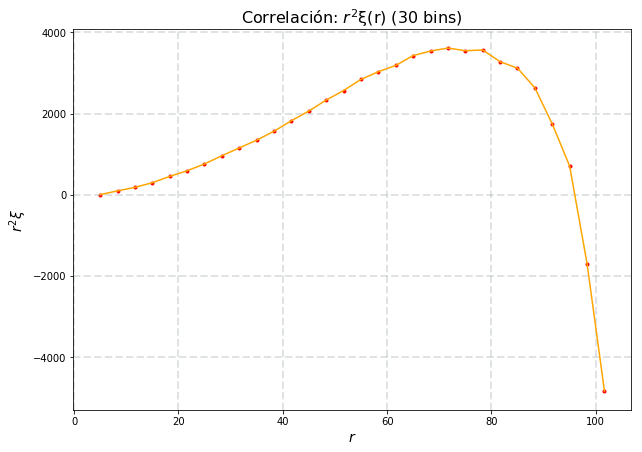

In [7]:
rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (30 bins)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

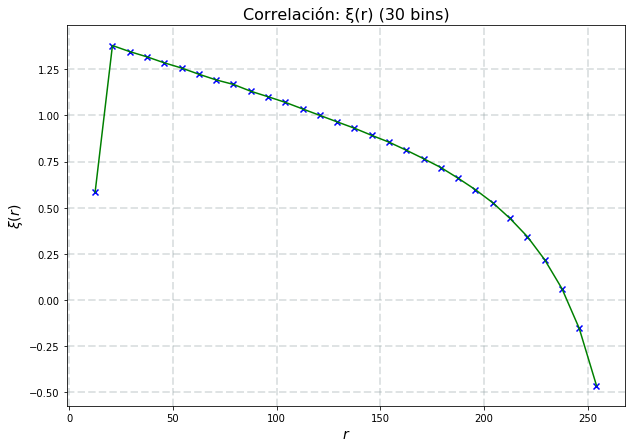

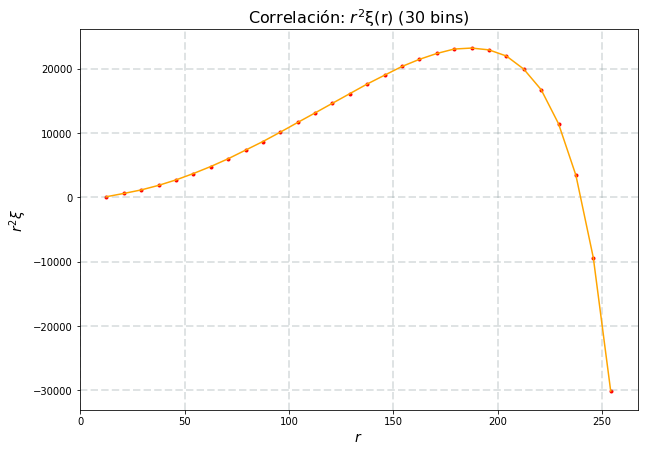

In [9]:
dots1 = cube(dim = 3, dots = 10000, length = 250)
dots2 = cube(dim = 3, dots = 10000, length = 250)

result = correlate(dots1, dots2, bins = 30, length = 250)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (30 bins)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (30 bins)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

# Pruebas 10k/20k/50k/250k

In [6]:
k10=np.load('CF_DATA/prueba_10k.npy')
k20=np.load('CF_DATA/prueba_20k.npy')
k50=np.load('CF_DATA/prueba_50k.npy')
k250=np.load('CF_DATA/prueba_250k.npy')

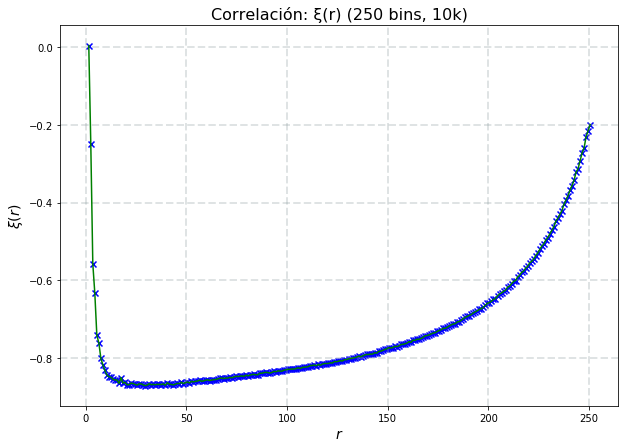

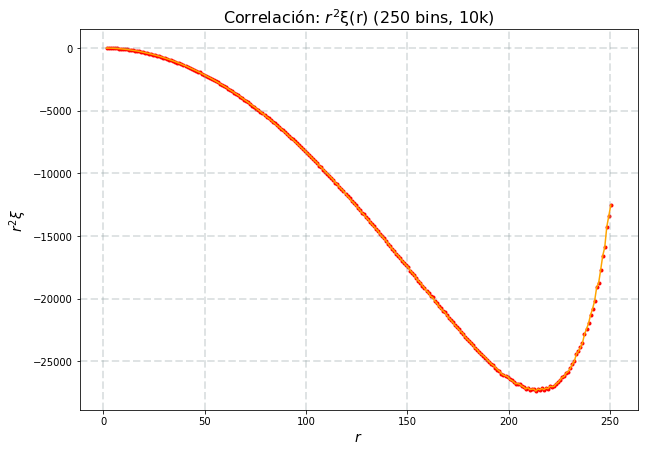

In [7]:
dots1 = cube(dim = 3, dots = 10000, length = 250)
result = correlate(k10, dots1, bins = 250, length = 250, landy = False)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 10k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 10k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

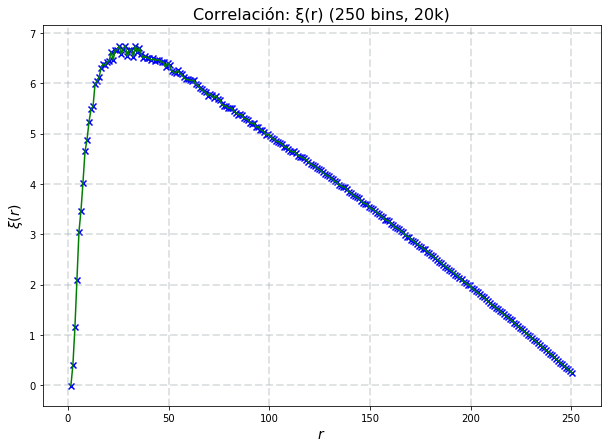

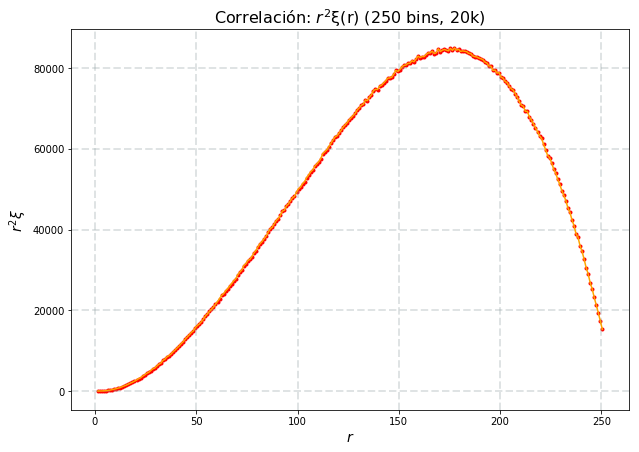

In [9]:
dots1 = cube(dim = 3, dots = 20000, length = 250)
result = correlate(dots1, k20, bins = 250, length = 250, landy = False)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 20k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 20k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

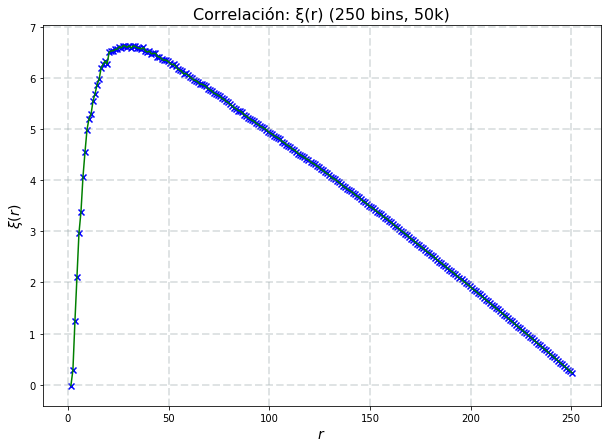

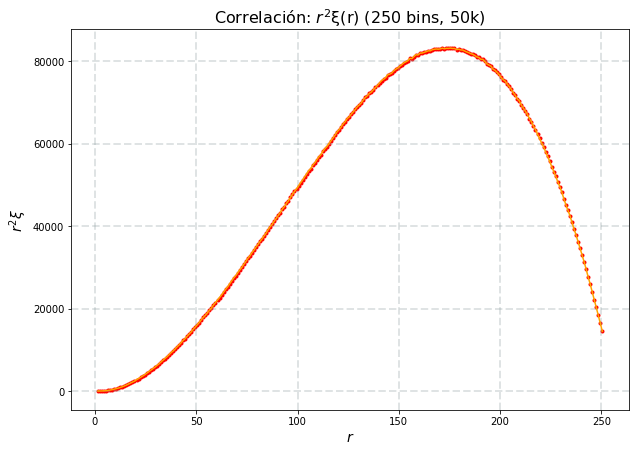

In [10]:
dots1 = cube(dim = 3, dots = 50000, length = 250)
result = correlate(dots1, k50, bins = 250, length = 250, landy = False)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 50k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 50k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

# Landy & Szalay

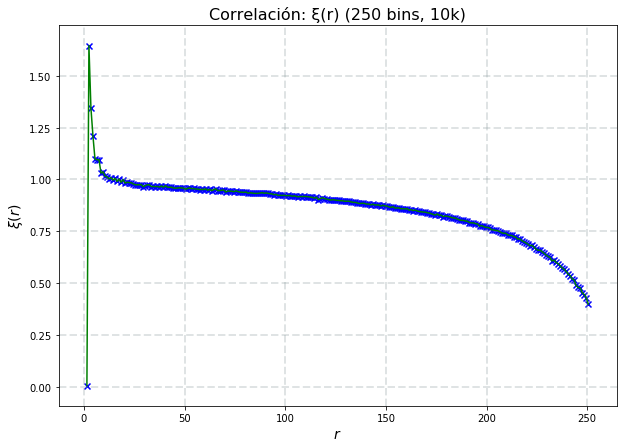

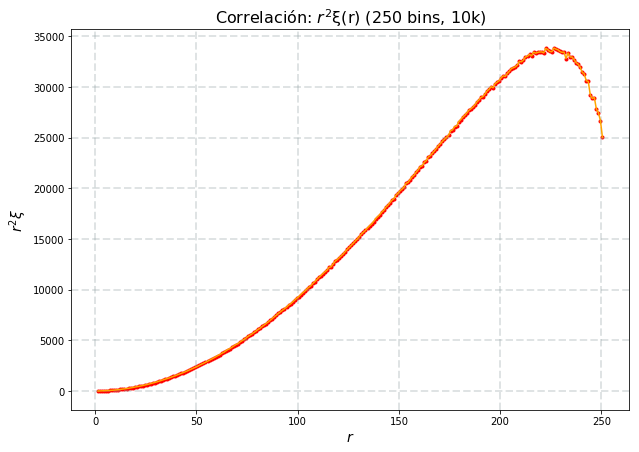

In [26]:
dots1 = cube(dim = 3, dots = 10000, length = 250)
result = correlate(k10, dots1, bins = 250, length = 250)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 10k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 10k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

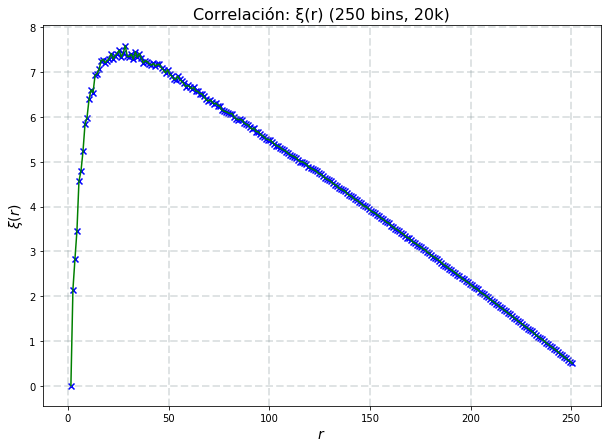

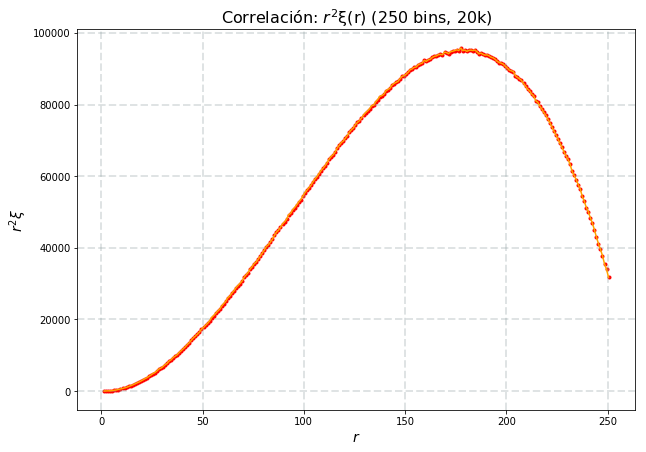

In [27]:
dots1 = cube(dim = 3, dots = 20000, length = 250)
result = correlate(dots1, k20, bins = 250, length = 250)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 20k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 20k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

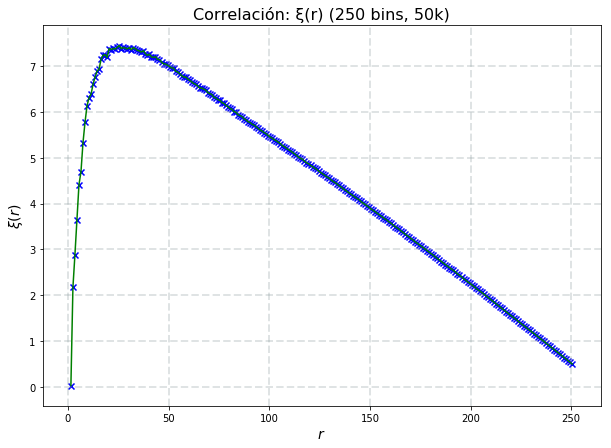

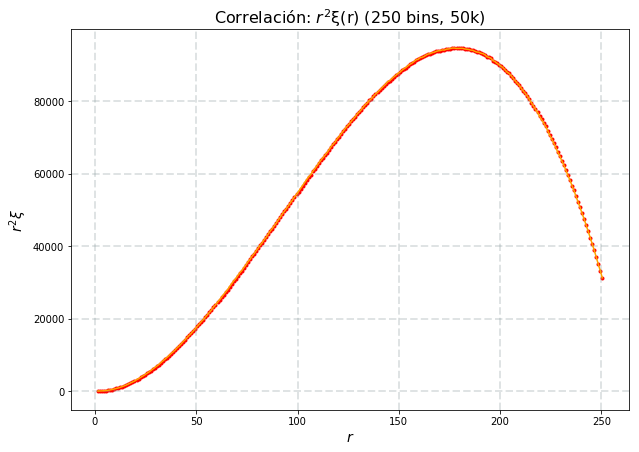

In [28]:
dots1 = cube(dim = 3, dots = 50000, length = 250)
result = correlate(dots1, k50, bins = 250, length = 250)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 50k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 50k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

In [ ]:
dots1 = cube(dim = 3, dots = 250000, length = 250)
result = correlate(dots1, k250, bins = 250, length = 250)
r = result[0]
xi = result[1]

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$ξ(r)$', fontsize = 14)
plt.title('Correlación: ξ(r) (250 bins, 250k)' , fontsize = 16)
plt.plot(r, xi, color = 'green')
plt.scatter(r, xi, color = 'blue', marker = 'x')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

rsquared = np.array(xi) * np.array(r)**2 

fig, ax0 = plt.subplots(figsize = (10, 7))
plt.xlabel('$r$', fontsize = 14)
plt.ylabel('$r^{2}ξ$', fontsize = 14)
plt.title('Correlación: $r^{2}$ξ(r) (250 bins, 250k)' , fontsize = 16)
plt.plot(r, rsquared, color = 'orange')
plt.scatter(r, rsquared, color = 'red', marker = '.')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)